In [1]:
# Root path and directory
import sys
import os

ROOT_PATH = "E:/ADS/python/ams/isaccade"
os.chdir(ROOT_PATH)

In [2]:
# Packages
import h5py as hy
import numpy as np
import pandas as pd
import scipy.io as spy
import utils.funcs.readMatfiles as readmat

In [3]:
# Folders and File path
ROOT_PATH = "E:/ADS/python/ams/isaccade"
get_data  = "data"
task      = "MG"
recordings = "fef"
analysis   = "sessions"
subject    = "m1"
session_date = "Apr26b"

fpath = "/".join([ROOT_PATH,get_data,task,recordings,analysis,subject,session_date])
print(fpath)

E:/ADS/python/ams/isaccade/data/MG/fef/sessions/m1/Apr26b


In [4]:
# File details
#file  = "DETAILS_all.mat"

file     = "MG_Jaggu_bkl.mat"

#file = "Neuron.mat"
#file = "Neuron_MERGED.mat"

#file = "UNITS_all.mat"

filename = fpath+'/'+file
filename

'E:/ADS/python/ams/isaccade/data/MG/fef/sessions/m1/Apr26b/MG_Jaggu_bkl.mat'

In [5]:
# Reading mat file
data = readmat.load_data(filename)

Opening mat file v7.0 Path: E:/ADS/python/ams/isaccade/data/MG/fef/sessions/m1/Apr26b/MG_Jaggu_bkl.mat


,Variables,Type,Fields,Dim
0,Events,dict,"[Abort_, Bot_, Correct_, EmStart_, Eot_, FixSp...",10
1,Eye_,dict,"[NormX_, NormY_, Saccade_]",3
2,Infos_,ndarray,float64,"(93, 59)"
3,Raw_,dict,[data],1
4,Result,dict,"[Correct, Success_eye, Success_eye2, Wrong_eye...",5
5,Timings_,dict,"[Fix_on_, Go_, Target_, Trig_, Trigger_]",5
6,Trialinfo_,dict,"[ht, pos, result]",3


In [6]:
# A. Event marker for each trial (Tempo Reflecting  system)
Events_per_trial = ['EmStart_','Bot_','FixSpotOn_','Trigger_','Target_','FixSpotOff_','Correct_','Reward_','Abort_','Eot_']

readmat.show_info(data['Events'])
Events = readmat.dict2array(data['Events'])
Events[Events_per_trial]

,Variables,Type,Fields,Dim
0,Abort_,ndarray,float64,"(93, 2)"
1,Bot_,ndarray,float64,"(93, 2)"
2,Correct_,ndarray,float64,"(93, 2)"
3,EmStart_,ndarray,float64,"(93, 2)"
4,Eot_,ndarray,float64,"(93, 2)"
5,FixSpotOff_,ndarray,float64,"(93, 2)"
6,FixSpotOn_,ndarray,float64,"(93, 2)"
7,Reward_,ndarray,float64,"(93, 2)"
8,Target_,ndarray,float64,"(93, 2)"
9,Trigger_,ndarray,float64,"(93, 2)"


,EmStart_,Bot_,FixSpotOn_,Trigger_,Target_,FixSpotOff_,Correct_,Reward_,Abort_,Eot_
0,0.0,957.0,966.0,1201.0,1206.0,NaN,NaN,NaN,1404.0,2043.0
1,0.0,810.0,824.0,1201.0,1208.0,NaN,NaN,NaN,2054.0,2693.0
2,0.0,918.0,925.0,2173.0,1213.0,2207.0,2541.0,2542.0,NaN,3234.0
3,0.0,894.0,910.0,2041.0,1215.0,2080.0,2440.0,2441.0,NaN,3133.0
4,0.0,840.0,852.0,2298.0,1205.0,2344.0,2654.0,2655.0,NaN,3347.0
...,...,...,...,...,...,...,...,...,...,...
88,0.0,893.0,898.0,2153.0,1203.0,2197.0,2514.0,2515.0,NaN,3207.0
89,0.0,857.0,873.0,2107.0,1210.0,2140.0,2463.0,2464.0,NaN,3156.0
90,0.0,935.0,948.0,2148.0,1204.0,2182.0,2485.0,2486.0,NaN,3178.0
91,0.0,814.0,826.0,1201.0,1211.0,NaN,NaN,NaN,1920.0,2559.0


In [7]:
# B. Event timings (From BOT)
Events_per_trial = ['Fix_on_','Trig_','Target_','Go_','Trigger_']

readmat.show_info(data['Timings_'])
result = readmat.dict2array(data['Timings_'])
result[Events_per_trial]

# Fix_on_ = FixateOn - Bot
# Trig_   = Trigger - Bot
# Target_ = Target - Bot
# Go_     = FixateOff - Bot

# Trigger_ = Trig_*[sampling rate (Blackrock)]/[sampling rate (Tempo)] (verify..)

,Variables,Type,Fields,Dim
0,Fix_on_,ndarray,float64,"(93, 1)"
1,Go_,ndarray,float64,"(93, 1)"
2,Target_,ndarray,float64,"(93, 1)"
3,Trig_,ndarray,float64,"(93, 1)"
4,Trigger_,ndarray,float64,"(93, 1)"


,Fix_on_,Trig_,Target_,Go_,Trigger_
0,9.0,244.0,249.0,NaN,7582.0
1,14.0,391.0,398.0,NaN,12168.0
2,7.0,1255.0,295.0,1289.0,8798.0
3,16.0,1147.0,321.0,1186.0,9547.0
4,12.0,1458.0,365.0,1504.0,11232.0
...,...,...,...,...,...
88,5.0,1260.0,310.0,1304.0,9578.0
89,16.0,1250.0,353.0,1283.0,10702.0
90,13.0,1213.0,269.0,1247.0,8268.0
91,12.0,387.0,397.0,NaN,12043.0


In [8]:
#(result['Trigger_']/result['Trig_'])/1.041

a = result['Go_']-result['Target_']

In [9]:
# C. Trials Info
ht     = data['Trialinfo_']['ht']
pos    = data['Trialinfo_']['pos']
result = data['Trialinfo_']['result']

readmat.show_info(data['Trialinfo_'])
trial_info = readmat.dict2array(data['Trialinfo_'])
display(trial_info)
a-trial_info['ht']

,Variables,Type,Fields,Dim
0,ht,ndarray,float64,"(93, 1)"
1,pos,ndarray,float64,"(93, 1)"
2,result,ndarray,float64,"(93, 1)"


,ht,pos,result
0,956.0,4.0,NaN
1,964.0,4.0,NaN
2,995.0,4.0,NaN
3,856.0,4.0,NaN
4,1134.0,4.0,NaN
...,...,...,...
88,985.0,5.0,NaN
89,930.0,3.0,NaN
90,979.0,1.0,NaN
91,948.0,0.0,NaN


0     NaN
1     NaN
2    -1.0
3     9.0
4     5.0
     ... 
88    9.0
89    0.0
90   -1.0
91    NaN
92    7.0
Length: 93, dtype: float64

In [10]:
# D. Trial Results
readmat.show_info(data['Result'])
result = readmat.dict2array(data['Result'])

,Variables,Type,Fields,Dim
0,Correct,ndarray,float64,"(93, 1)"
1,Success_eye,ndarray,float64,"(93, 1)"
2,Success_eye2,ndarray,float64,"(93, 1)"
3,Wrong_eye,ndarray,float64,"(93, 1)"
4,Wrong_eye2,ndarray,float64,"(93, 1)"


In [11]:
# E. Eye movements and traces
readmat.show_info(data['Eye_'])

,Variables,Type,Fields,Dim
0,NormX_,ndarray,float64,"(93, 1500)"
1,NormY_,ndarray,float64,"(93, 1500)"
2,Saccade_,ndarray,float64,"(93, 3)"


In [12]:
x=data['Eye_']['NormX_']
y=data['Eye_']['NormY_']

onsets = data['Eye_']['Saccade_']/4

563.0


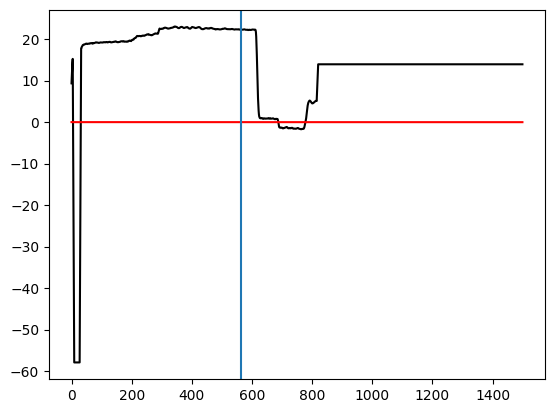

In [13]:
import matplotlib.pyplot as plt

trial_no = 10

vl = Events['FixSpotOff_'][trial_no]/4
print(vl)


plt.plot(y[trial_no,:],'-k')
plt.plot(x[trial_no,:],'-r')
plt.axvline(x=vl)

In [14]:
"""
## Animation for gif

from PIL import Image

# Take list of paths for images
image_path_list = ['dog-1.jpg', 'dog-2.jpg', 'dog-3.jpg']

# Create a list of image objects
image_list = [Image.open(file) for file in image_path_list]

# Save the first image as a GIF file
image_list[0].save(
            'animation.gif',
            save_all=True,
            append_images=image_list[1:], # append rest of the images
            duration=1000, # in milliseconds
            loop=0)

"""


"\n## Animation for gif\n\nfrom PIL import Image\n\n# Take list of paths for images\nimage_path_list = ['dog-1.jpg', 'dog-2.jpg', 'dog-3.jpg']\n\n# Create a list of image objects\nimage_list = [Image.open(file) for file in image_path_list]\n\n# Save the first image as a GIF file\nimage_list[0].save(\n            'animation.gif',\n            save_all=True,\n            append_images=image_list[1:], # append rest of the images\n            duration=1000, # in milliseconds\n            loop=0)\n\n"

In [15]:
"""
# importing matplot lib
import matplotlib.pyplot as plt
import numpy as np

# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# numpy array
x = np.linspace(-2, 2, 200)

# duration of the video
duration = 2

# matplot subplot
fig, ax = plt.subplots()

# method to get frames
def make_frame(t):
	
	# clear
	ax.clear()
	
	# plotting line
	ax.plot(x, np.sinc(x**2) + np.sin(x + 2 * np.pi / duration * t), lw = 3)
	ax.set_ylim(-1.5, 2.5)
	
	# returning numpy image
	return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(make_frame, duration = duration)

# displaying animation with auto play and looping
animation.ipython_display(fps = 20, loop = True, autoplay = True)

"""

'\n# importing matplot lib\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# importing movie py libraries\nfrom moviepy.editor import VideoClip\nfrom moviepy.video.io.bindings import mplfig_to_npimage\n\n# numpy array\nx = np.linspace(-2, 2, 200)\n\n# duration of the video\nduration = 2\n\n# matplot subplot\nfig, ax = plt.subplots()\n\n# method to get frames\ndef make_frame(t):\n\t\n\t# clear\n\tax.clear()\n\t\n\t# plotting line\n\tax.plot(x, np.sinc(x**2) + np.sin(x + 2 * np.pi / duration * t), lw = 3)\n\tax.set_ylim(-1.5, 2.5)\n\t\n\t# returning numpy image\n\treturn mplfig_to_npimage(fig)\n\n# creating animation\nanimation = VideoClip(make_frame, duration = duration)\n\n# displaying animation with auto play and looping\nanimation.ipython_display(fps = 20, loop = True, autoplay = True)\n\n'